## ЛР2 ИУ5-62Б Ковалев Сергей

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [42]:
data = pd.read_csv('/Users/set27/Downloads/marvel-wikia-data.csv', sep=",")

In [43]:
data.shape

(16376, 13)

In [44]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

Проверяем на наличие пропусков

In [45]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [46]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


# Обработка пропусков

Удаление колонок с пустыми значениями

In [47]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16376, 13), (16376, 3))

Удаление строк с пустыми значениями

In [48]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

Заполнение всех пустых значений 0

In [49]:
data_new_3 = data.fillna(0)
data_new_3.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,0,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,0,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,2258.0,Nov-50,1950.0


Обработка числовых пропусков. Импьютация

In [50]:
num_cols = []
total_count = 205
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 534.63%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 397.56%.


In [51]:
data_num = data[num_cols]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


In [53]:
data_num_MasVnrArea = data_num[['APPEARANCES']]
data_num_MasVnrArea.head()

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0


In [54]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [55]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

используем различные методы

In [56]:
strategies=['mean', 'median', 'most_frequent']

In [57]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [58]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([17.03337696, 17.03337696, 17.03337696, ..., 17.03337696,
        17.03337696, 17.03337696]))

In [59]:
strategies[1], test_num_impute(strategies[1])

('median', array([3., 3., 3., ..., 3., 3., 3.]))

In [60]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [61]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [62]:
data[['Year']].describe()

,Year
count,15561.000000
mean,1984.951803
std,19.663571
min,1939.000000
25%,1974.000000
50%,1990.000000
75%,2000.000000
max,2013.000000


In [63]:
test_num_impute_col(data, 'Year', strategies[0])

('Year', 'mean', 815, 1984.9518025833815, 1984.9518025833815)

In [64]:
test_num_impute_col(data, 'Year', strategies[1])

('Year', 'median', 815, 1990.0, 1990.0)

In [65]:
test_num_impute_col(data, 'Year', strategies[2])

('Year', 'most_frequent', 815, 1993.0, 1993.0)

In [66]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 1839.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 1371.71%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 4764.39%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 2080.0%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 416.59%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 7944.39%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 1.46%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 397.56%.


In [67]:
cat_temp_data = data[['ALIVE']]
cat_temp_data.head()

,ALIVE
0,Living Characters
1,Living Characters
2,Living Characters
3,Living Characters
4,Living Characters


In [68]:
cat_temp_data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [69]:
cat_temp_data[cat_temp_data['ALIVE'].isnull()].shape

(3, 1)

In [70]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Living Characters'],
       ['Living Characters'],
       ['Living Characters'],
       ...,
       ['Living Characters'],
       ['Living Characters'],
       ['Living Characters']], dtype=object)

In [71]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Deceased Characters', 'Living Characters'], dtype=object)

In [72]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Living Characters'],
       ['Living Characters'],
       ['Living Characters'],
       ...,
       ['Living Characters'],
       ['Living Characters'],
       ['Living Characters']], dtype=object)

In [73]:
np.unique(data_imp3)

array(['Deceased Characters', 'Living Characters', 'NA'], dtype=object)

In [74]:
data_imp3[data_imp3=='NA'].size

3

преобразование категориальных признаков в числовые

In [75]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Living Characters
1,Living Characters
2,Living Characters
3,Living Characters
4,Living Characters
...,...
16371,Living Characters
16372,Living Characters
16373,Living Characters
16374,Living Characters


Кодирование категорий целочисленными значениями

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [77]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [78]:
cat_enc['c1'].unique()

array(['Living Characters', 'Deceased Characters'], dtype=object)

In [79]:
np.unique(cat_enc_le)

array([0, 1])

In [80]:
le.inverse_transform([0, 1])

array(['Deceased Characters', 'Living Characters'], dtype=object)

Кодирование категорий наборами бинарных значений

In [81]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [82]:
cat_enc.shape

(16376, 1)

In [83]:
cat_enc_ohe.shape

(16376, 2)

In [84]:
cat_enc_ohe

<16376x2 sparse matrix of type '<class 'numpy.float64'>'
	with 16376 stored elements in Compressed Sparse Row format>

In [85]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [86]:
cat_enc.head(10)

,c1
0,Living Characters
1,Living Characters
2,Living Characters
3,Living Characters
4,Living Characters
5,Living Characters
6,Living Characters
7,Living Characters
8,Living Characters
9,Living Characters


Масштабирование данных

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [89]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['page_id']])

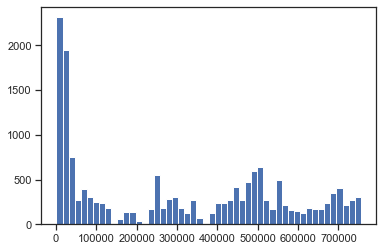

In [90]:
plt.hist(data['page_id'], 50)
plt.show()

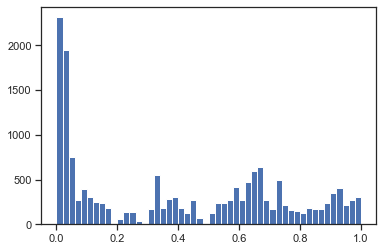

In [91]:
plt.hist(sc1_data, 50)
plt.show()

In [92]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['page_id']])

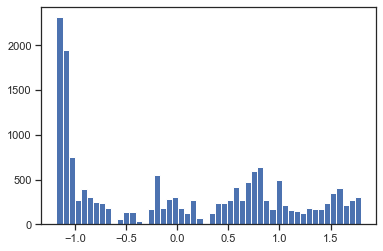

In [93]:
plt.hist(sc2_data, 50)
plt.show()